## Part 1

This part based on data submissions:

- #### LB=0.37474 - v34 - [Optimal Fertilizers Prediction](https://www.kaggle.com/code/mahmoudehab6677/optimal-fertilizers-prediction/notebook) by [Mahmoud Ehab](https://www.kaggle.com/mahmoudehab6677)
- #### LB=0.37631 - v05 - [20250618_PG6_XGB](https://www.kaggle.com/code/elainedazzio/20250618-pg6-xgb/notebook) by [L. Elaine Dazzio](https://www.kaggle.com/elainedazzio)
- #### LB=0.37780 - v04 - [S5E6 | Single XGBoost - Orig*4](https://www.kaggle.com/code/masayakawamata/s5e6-single-xgboost-orig-4) by [Masaya Kawamata](https://www.kaggle.com/masayakawamata)
- #### LB=0.37856 - v03 - [Single XGB](https://www.kaggle.com/code/hahahaj/single-xgb) by [hahahaj](https://www.kaggle.com/hahahaj)

&nbsp;

Step 1: &nbsp; get file '.. GEN_1' from 4 base files by comparing the number of elements in a line

Step 2: &nbsp; '.. GEN_1' added to Top.2 and the string comparison algorithm will be used as in previous attempts - '.. GEN_2,3'

Step 3: &nbsp; Top.4 public solutions + GEN_1,2,3 -> Step 1 -> GEN_4

Step 4: &nbsp; Top.3 public solutions + GEN_1,3 &nbsp;&nbsp; -> Step 1 -> GEN_5

&nbsp; 

## Part 2

This part based on data submissions:

- #### LB=0.37758 - v14 - [S05E06 | Fertilizer Optimization | Ensemble](https://www.kaggle.com/code/ravaghi/s05e06-fertilizer-optimization-ensemble/notebook) by [Magdi Ravaghi](https://www.kaggle.com/ravaghi)
- #### LB=0.37757 - v08 - [Comparing Multiclass Ensembling Techniques](https://www.kaggle.com/code/ravaghi/comparing-multiclass-ensembling-techniques)(5 files) by [Magdi Ravaghi](https://www.kaggle.com/ravaghi)
- #### LB=0.37620 - v22 - [xgboost_s5e6](https://www.kaggle.com) by [耶✌](https://www.kaggle.com)
- #### LB=0.37582 - v24 - [xgboost_s5e6](https://www.kaggle.com) by [耶✌](https://www.kaggle.com)
- 
- #### LB=0.37672 - v14 - **GEN_8** - [Ensemble of Top 4 public solutions](https://www.kaggle.com/code/nina2025/ensemble-of-top-4-public-solutions) - [Lion-li-li](https://www.kaggle.com/nina2025)
&nbsp;

### Final.1 -> GEN_1 + GEN_3 + GEN_5 + GEN_8 &nbsp;-> &nbsp; &nbsp; GEN_F1 -> LB=0.37696
### Final.2 -> 9 public solution's with out GEN's &nbsp;-> &nbsp;&nbsp;&nbsp; GEN_F2 -> LB=0.38005

&nbsp;

## Part 3

Exact copy of **Part 1**, only replacing 1 file

- #### LB=0.37631 - v05 - [20250618_PG6_XGB](https://www.kaggle.com/code/elainedazzio/20250618-pg6-xgb/notebook) by [L. Elaine Dazzio](https://www.kaggle.com/elainedazzio)
- #### LB=0.37758 - v14 - [S05E06 | Fertilizer Optimization | Ensemble](https://www.kaggle.com/code/ravaghi/s05e06-fertilizer-optimization-ensemble/notebook) by [Magdi Ravaghi](https://www.kaggle.com/ravaghi)
- #### LB=0.37780 - v04 - [S5E6 | Single XGBoost - Orig*4](https://www.kaggle.com/code/masayakawamata/s5e6-single-xgboost-orig-4) by [Masaya Kawamata](https://www.kaggle.com/masayakawamata)
- #### LB=0.37856 - v03 - [Single XGB](https://www.kaggle.com/code/hahahaj/single-xgb) by [hahahaj](https://www.kaggle.com/hahahaj)

&nbsp;

Step 1: &nbsp; get file '.. GEN_11' from 4 base files by comparing the number of elements in a line

Step 2: &nbsp; '.. GEN_11' added to Top.2 and the string comparison algorithm will be used as in previous attempts - '.. GEN_13'

Step 3: &nbsp; missed

Step 4: &nbsp; Top.3 public solutions + GEN_11,13 &nbsp;&nbsp; -> Step 1 -> GEN_15

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

_ = ["" for i in range(250_000)]

# Part 1

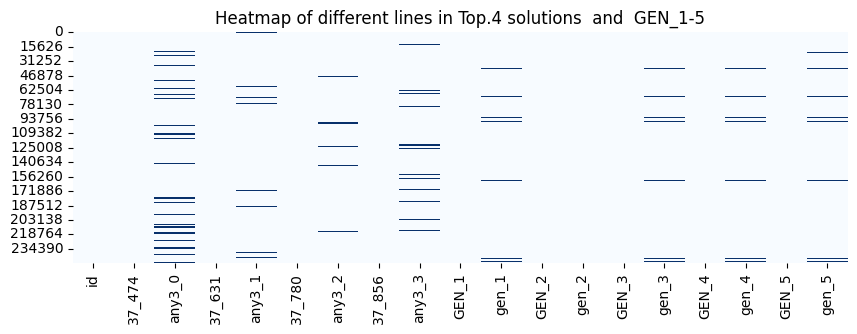

In [2]:
path = '/kaggle/input/19-june-2025-fertilizer/submission__LB__0_'

st_names = ['37_474','37_631','37_780','37_856','GEN_1','GEN_2','GEN_3','GEN_4','GEN_5']
obezyany = ['any3_0','any3_1','any3_2','any3_3','gen_1','gen_2','gen_3','gen_4','gen_5']

def read(ns):
    return [pd.read_csv(path + name_subm +'.csv') for name_subm in ns]

def rename(dfs,ns=st_names):
    for i in range(len(dfs)):
        dfs[i] = dfs[i].rename(columns={'Fertilizer Name': f'{ns[i]}'})

def addany(dfs,obezyany):
    for i in range(len(dfs)):
        dfs[i][f'{obezyany[i]}'] = _

def merge(dfs):
    dfsm = pd.merge(dfs[0], dfs[1], on="id")
    for i in range(2,len(dfs)):
        dfsm = pd.merge(dfsm,dfs[i],on='id')
    return dfsm

def load():
    dfs = read(st_names)
    rename(dfs,st_names)
    addany(dfs,obezyany)
    return merge(dfs)

def f_any3in4(x,ix,ns):
    i = [n for n in range(len(ns))]
    i.remove(ix)
    if x[ns[i[0]]]==x[ns[i[1]]]==x[ns[i[2]]] and x[ns[i[0]]]!=x[ns[ix]]:
        return None
    return ""

def f_not_equ(x,l,ns):
    for i in range(len(ns)):
        for j in range(len(ns)):
            if i!=j and x[ns[i]]==x[ns[j]]:
                return ""
    return None

def Visual_any3in4_GEN(dfs,ns,gen):
    ns             = ns[:4]
    nslb           = ns
    nsg2,nsg4      = ns+['GEN_2'],ns+['GEN_4']
    nsg1,nsg3,nsg5 = ns+['GEN_1'],ns+['GEN_3'],ns+['GEN_5']
    dfs['any3_0']  = dfs.apply(lambda x: f_any3in4(x,0,nslb), axis=1)
    dfs['any3_1']  = dfs.apply(lambda x: f_any3in4(x,1,nslb), axis=1)
    dfs['any3_2']  = dfs.apply(lambda x: f_any3in4(x,2,nslb), axis=1)
    dfs['any3_3']  = dfs.apply(lambda x: f_any3in4(x,3,nslb), axis=1)
    dfs['gen_1']   = dfs.apply(lambda x: f_not_equ(x,4,nsg1), axis=1)
    dfs['gen_2']   = dfs.apply(lambda x: f_not_equ(x,5,nsg2), axis=1)
    dfs['gen_3']   = dfs.apply(lambda x: f_not_equ(x,6,nsg3), axis=1)
    dfs['gen_4']   = dfs.apply(lambda x: f_not_equ(x,7,nsg4), axis=1)
    dfs['gen_5']   = dfs.apply(lambda x: f_not_equ(x,8,nsg5), axis=1)

    plt.figure(figsize=(10, 3))
    sns.heatmap(dfs.isnull(), cbar=False, cmap="Blues")
    plt.title(f"Heatmap of different lines in Top.4 solutions  and  {gen}")
    plt.show()


dfs = load()

Visual_any3in4_GEN(dfs, st_names, gen='GEN_1-5')

In [3]:
# df = pd.read_csv(path + 'GEN_1.csv') # Lb = 0.37_986
# df = pd.read_csv(path + 'GEN_2.csv') # Lb = 0.37_867
# df = pd.read_csv(path + 'GEN_3.csv') # Lb = 0.37_999
# df = pd.read_csv(path + 'GEN_4.csv') # Lb = 0.37_988

df = pd.read_csv(path + 'GEN_5.csv')  # Lb = 0.38_009

df.to_csv('submission_GEN_5.csv', index=False)

display(df)

,id,Fertilizer Name
0,750000,10-26-26 20-20 DAP
1,750001,17-17-17 10-26-26 Urea
2,750002,20-20 Urea DAP
3,750003,14-35-14 DAP 17-17-17
4,750004,Urea 20-20 17-17-17
...,...,...
249995,999995,Urea 14-35-14 17-17-17
249996,999996,14-35-14 28-28 10-26-26
249997,999997,Urea 10-26-26 DAP
249998,999998,10-26-26 17-17-17 DAP


# Part 2



In [4]:
path = '/kaggle/input/20-june-2025-fertilizer/submission__LB__0_'

#df = pd.read_csv(path + 'GEN_8.csv')   # Lb = 0.37_672
#df = pd.read_csv(path + 'GEN_F1.csv')  # Lb = 0.37_996
#df = pd.read_csv(path + 'GEN_F2.csv')  # Lb = 0.38_005

df = pd.read_csv(path + 'GEN_7.csv')   # Lb = 0.38_005        ( GEN_3 + GEN_5 + GEN_F2) 

df.to_csv('submission_GEN_7.csv', index=False)

display(df)

,id,Fertilizer Name
0,750000,10-26-26 20-20 DAP
1,750001,17-17-17 10-26-26 Urea
2,750002,20-20 Urea DAP
3,750003,14-35-14 DAP 17-17-17
4,750004,Urea 20-20 17-17-17
...,...,...
249995,999995,Urea 14-35-14 17-17-17
249996,999996,14-35-14 28-28 10-26-26
249997,999997,Urea 10-26-26 DAP
249998,999998,10-26-26 17-17-17 DAP


# Part 3

Exact copy of **Part 1**, only replacing 1 file

&nbsp;

Step 1: &nbsp; get file '.. GEN_11' from 4 base files by comparing the number of elements in a line

Step 2: &nbsp; '.. GEN_11' added to Top.2 and the string comparison algorithm will be used as in previous attempts - '.. GEN_13'

Step 3: &nbsp; missed

Step 4: &nbsp; Top.3 public solutions + GEN_11,13 &nbsp;&nbsp; -> Step 1 -> GEN_15


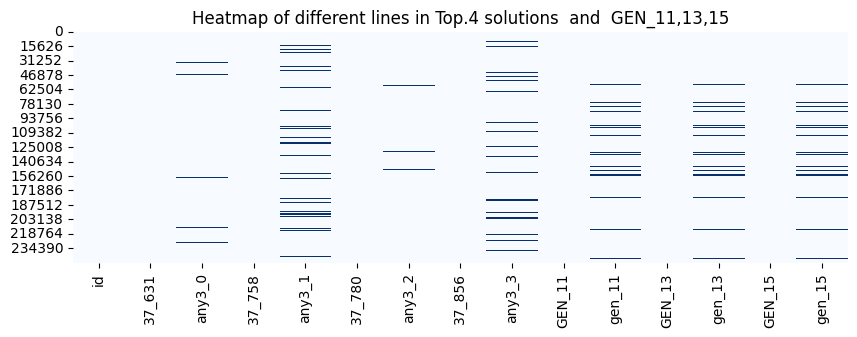

In [5]:
path = '/kaggle/input/21-june-2025-fertilizer/submission__LB__0_'

st_names = ['37_631','37_758','37_780','37_856','GEN_11','GEN_13','GEN_15']
obezyany = ['any3_0','any3_1','any3_2','any3_3','gen_11','gen_13','gen_15']

def Visual_any3in4_GEN(dfs,ns,gen):
    ns             = ns[:4]
    nslb           = ns
    nsg1,nsg3,nsg5 = ns+['GEN_11'],ns+['GEN_13'],ns+['GEN_15']
    dfs['any3_0']  = dfs.apply(lambda x: f_any3in4(x,0,nslb), axis=1)
    dfs['any3_1']  = dfs.apply(lambda x: f_any3in4(x,1,nslb), axis=1)
    dfs['any3_2']  = dfs.apply(lambda x: f_any3in4(x,2,nslb), axis=1)
    dfs['any3_3']  = dfs.apply(lambda x: f_any3in4(x,3,nslb), axis=1)
    dfs['gen_11']  = dfs.apply(lambda x: f_not_equ(x,4,nsg1), axis=1)
    dfs['gen_13']  = dfs.apply(lambda x: f_not_equ(x,5,nsg3), axis=1)
    dfs['gen_15']  = dfs.apply(lambda x: f_not_equ(x,8,nsg5), axis=1)

    plt.figure(figsize=(10, 3))
    sns.heatmap(dfs.isnull(), cbar=False, cmap="Blues")
    plt.title(f"Heatmap of different lines in Top.4 solutions  and  {gen}")
    plt.show()


def load(obezyany=obezyany,st_names=st_names):
    dfs = read(st_names)
    rename(dfs,st_names)
    addany(dfs,obezyany)
    return merge(dfs)


dfs = load()

Visual_any3in4_GEN(dfs, st_names, gen='GEN_11,13,15')

In [6]:
#df = pd.read_csv(path + 'GEN_11.csv') # Lb = 0.38_089
#df = pd.read_csv(path + 'GEN_13.csv') # Lb = 0.38_084
df = pd.read_csv(path + 'GEN_15.csv') # Lb = ?

df.to_csv('submission.csv', index=False)

display(df)

,id,Fertilizer Name
0,750000,10-26-26 20-20 DAP
1,750001,17-17-17 10-26-26 Urea
2,750002,20-20 Urea DAP
3,750003,14-35-14 17-17-17 Urea
4,750004,Urea 20-20 17-17-17
...,...,...
249995,999995,Urea 14-35-14 17-17-17
249996,999996,14-35-14 28-28 10-26-26
249997,999997,Urea 10-26-26 DAP
249998,999998,10-26-26 17-17-17 DAP
